In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

import pickle
import json

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
data = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
df= pd.DataFrame(data.data,columns=data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
x=df
y=data.target

In [9]:
a= std.fit_transform(x)

In [39]:
df.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

## Train test split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=22,test_size=0.25)

## Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
std = StandardScaler()

In [8]:
x_train_scale = std.fit_transform(x_train)
x_test_scale = std.transform(x_test)

## Model building

In [10]:
knn = KNeighborsRegressor()

In [11]:
knn.fit(x_train_scale,y_train)

KNeighborsRegressor()

## Evaluation on Testing Data

In [12]:
y_pred = knn.predict(x_test_scale)

In [13]:
from sklearn.metrics import mean_squared_error,r2_score

In [14]:
mse = mean_squared_error(y_test,y_pred)
print('mean squred error',mse)

mean squred error 17.346894488188973


In [15]:
r2_score(y_test,y_pred)

0.7932256309703104

## Evaluation on Training Data

In [16]:
y_pred1 = knn.predict(x_train_scale)

In [17]:
mean_squared_error(y_pred1,y_train)

14.745214775725593

In [18]:
r2_score(y_pred1,y_train)

0.7444992783156454

In [27]:
np.mean(cross_val_score(knn,a,y,cv=5,scoring='r2'))

0.5491534166428973

In [28]:
knn

KNeighborsRegressor(n_neighbors=8, p=1)

r2_train_list:
 [0.9151865779950834, 0.8961903731958318, 0.8603572291355558, 0.8382979718773624, 0.8135599599700645, 0.8073389964857904, 0.7933142904098477, 0.7780716136452857, 0.768801065588401, 0.7619345079793918, 0.7576380731814552, 0.7487532932902705, 0.7438167016433095, 0.7319137294314846, 0.7236828117680892, 0.7134078814606204, 0.7064356272756149, 0.7048832244053018, 0.7002705436996183, 0.6954194148883506]

r2_test_list:
 [0.8287873062227905, 0.8372639080287746, 0.8191057372994398, 0.7987976043657238, 0.7866412886159646, 0.7777961712925324, 0.7746308504077397, 0.7626840484232393, 0.7764321183842791, 0.7639375227806874, 0.7635949742478312, 0.7667189276213415, 0.7584058002629024, 0.7616264324975032, 0.7698726573103597, 0.7648984351263932, 0.7581967066432432, 0.7644911691450924, 0.762285877427053, 0.7587087678932682]


Text(0.5, 1.0, 'K VALUE VS R2 SCORE')

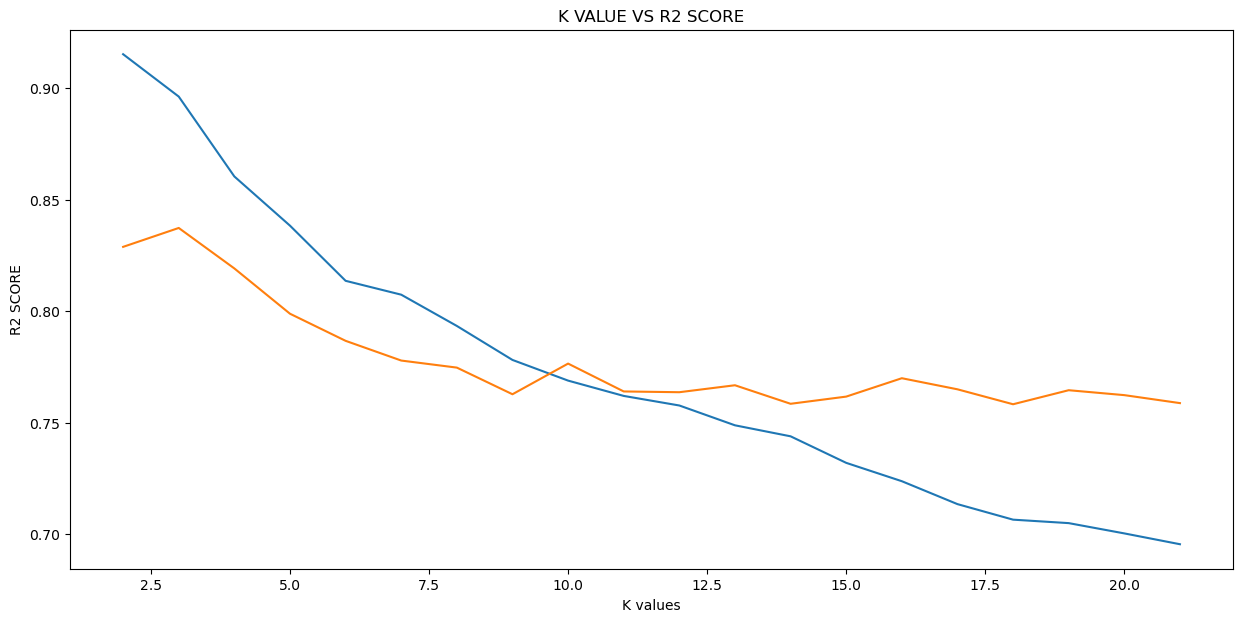

In [20]:
k_value_train=[]
k_value_test = []
kn = range(2,22)
for k in kn:
    knn = KNeighborsRegressor(n_neighbors=k,p=1)
    knn.fit(x_train_scale,y_train)
    r2 = knn.score(x_train_scale,y_train)
    k_value_train.append(r2)
    
    r2 = knn.score(x_test_scale,y_test)
    k_value_test.append(r2)
    
print("r2_train_list:\n",k_value_train )
print()
print("r2_test_list:\n",k_value_test)
    

plt.figure(figsize=(15,7))
plt.plot(kn,k_value_train)  
plt.plot(kn,k_value_test)
plt.xlabel ("K values")
plt.ylabel ("R2 SCORE")
plt.title  ("K VALUE VS R2 SCORE")

In [21]:
knn = KNeighborsRegressor(n_neighbors=8,p=1)
knn.fit(x_train_scale,y_train)


y_pred = knn.predict(x_test_scale)

print(r2_score(y_test,y_pred))

0.7746308504077397


In [22]:
y_pred = knn.predict(x_train_scale)
print(r2_score(y_train,y_pred))

0.7933142904098477


In [24]:
knn

KNeighborsRegressor(n_neighbors=8, p=1)

In [25]:
with open('knn_model.pkl','wb')as f:
    pickle.dump(knn,f)

In [26]:
with open('scaling.pkl','wb') as f:
    pickle.dump(std,f)

In [30]:
np.zeros(13)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])